In [1]:
# 基本資料處理與繪圖套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 紀錄時間與資料格式套件
from datetime import datetime
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p 

In [3]:
# !pip install mlxtend

In [4]:
# !pip install xgboost

In [5]:
# !pip install lightgbm

In [6]:
# 機器學習相關套件
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
# 系統套件
import warnings
import os
warnings.filterwarnings('ignore')
# 忽略警告消息

In [8]:
# 檢視資料
print(os.listdir('.'))

['archive.zip', 'data_description.txt', 'Kaggle_House_Price_0511.ipynb', 'Kaggle_House_Price_0518.ipynb', 'Kaggle_House_Price_0525.ipynb', 'MobilePrice', 'sample_submission.csv', 'test.csv', 'train.csv']


In [9]:
# 利用pandas讀入資料
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(1460, 81)


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# df_test = pd.read_csv(r"C:\Users\ccuser\Desktop\test.csv")
df_test = pd.read_csv("test.csv")
df_test.shape
# 少 SalePrice 欄位，所以少一個(那是目標)

(1459, 80)

In [13]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_sub = pd.read_csv("sample_submission.csv")
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# 資料預處理

In [16]:
# 資料切割
# 將Id欄位取出並從DataFrame刪除
# df_train.Id
# df_train["Id"]
df_train_Id = df_train.Id
df_test_Id = df_test.Id

In [17]:
# 刪除欄位 drop()
df_train.drop(['Id'], axis=1, inplace=True)
# df_train = df_train.drop(['Id'], axis=1)
df_test.drop(['Id'], axis=1, inplace=True)

In [18]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
# 分出數值型資料與類別型資料
all_cols = df_test.columns.tolist()
all_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [22]:
num_cols = [] # 數值型資料欄位List
cat_cols = [] # 類別型資料欄位List

for col in all_cols:
    if(df_test[col].dtype != 'object'):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [23]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [24]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
len(num_cols)

36

In [28]:
df_train.shape

(1460, 80)

In [29]:
# 計算所有欄位有空值的筆數
count = df_train.isnull().sum()
count[count > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

雖然前幾個貌似是很多空值，但其實是因為當初填值就是填NA，所以要先觀察資料、瞭解資料的內容，不要誤刪

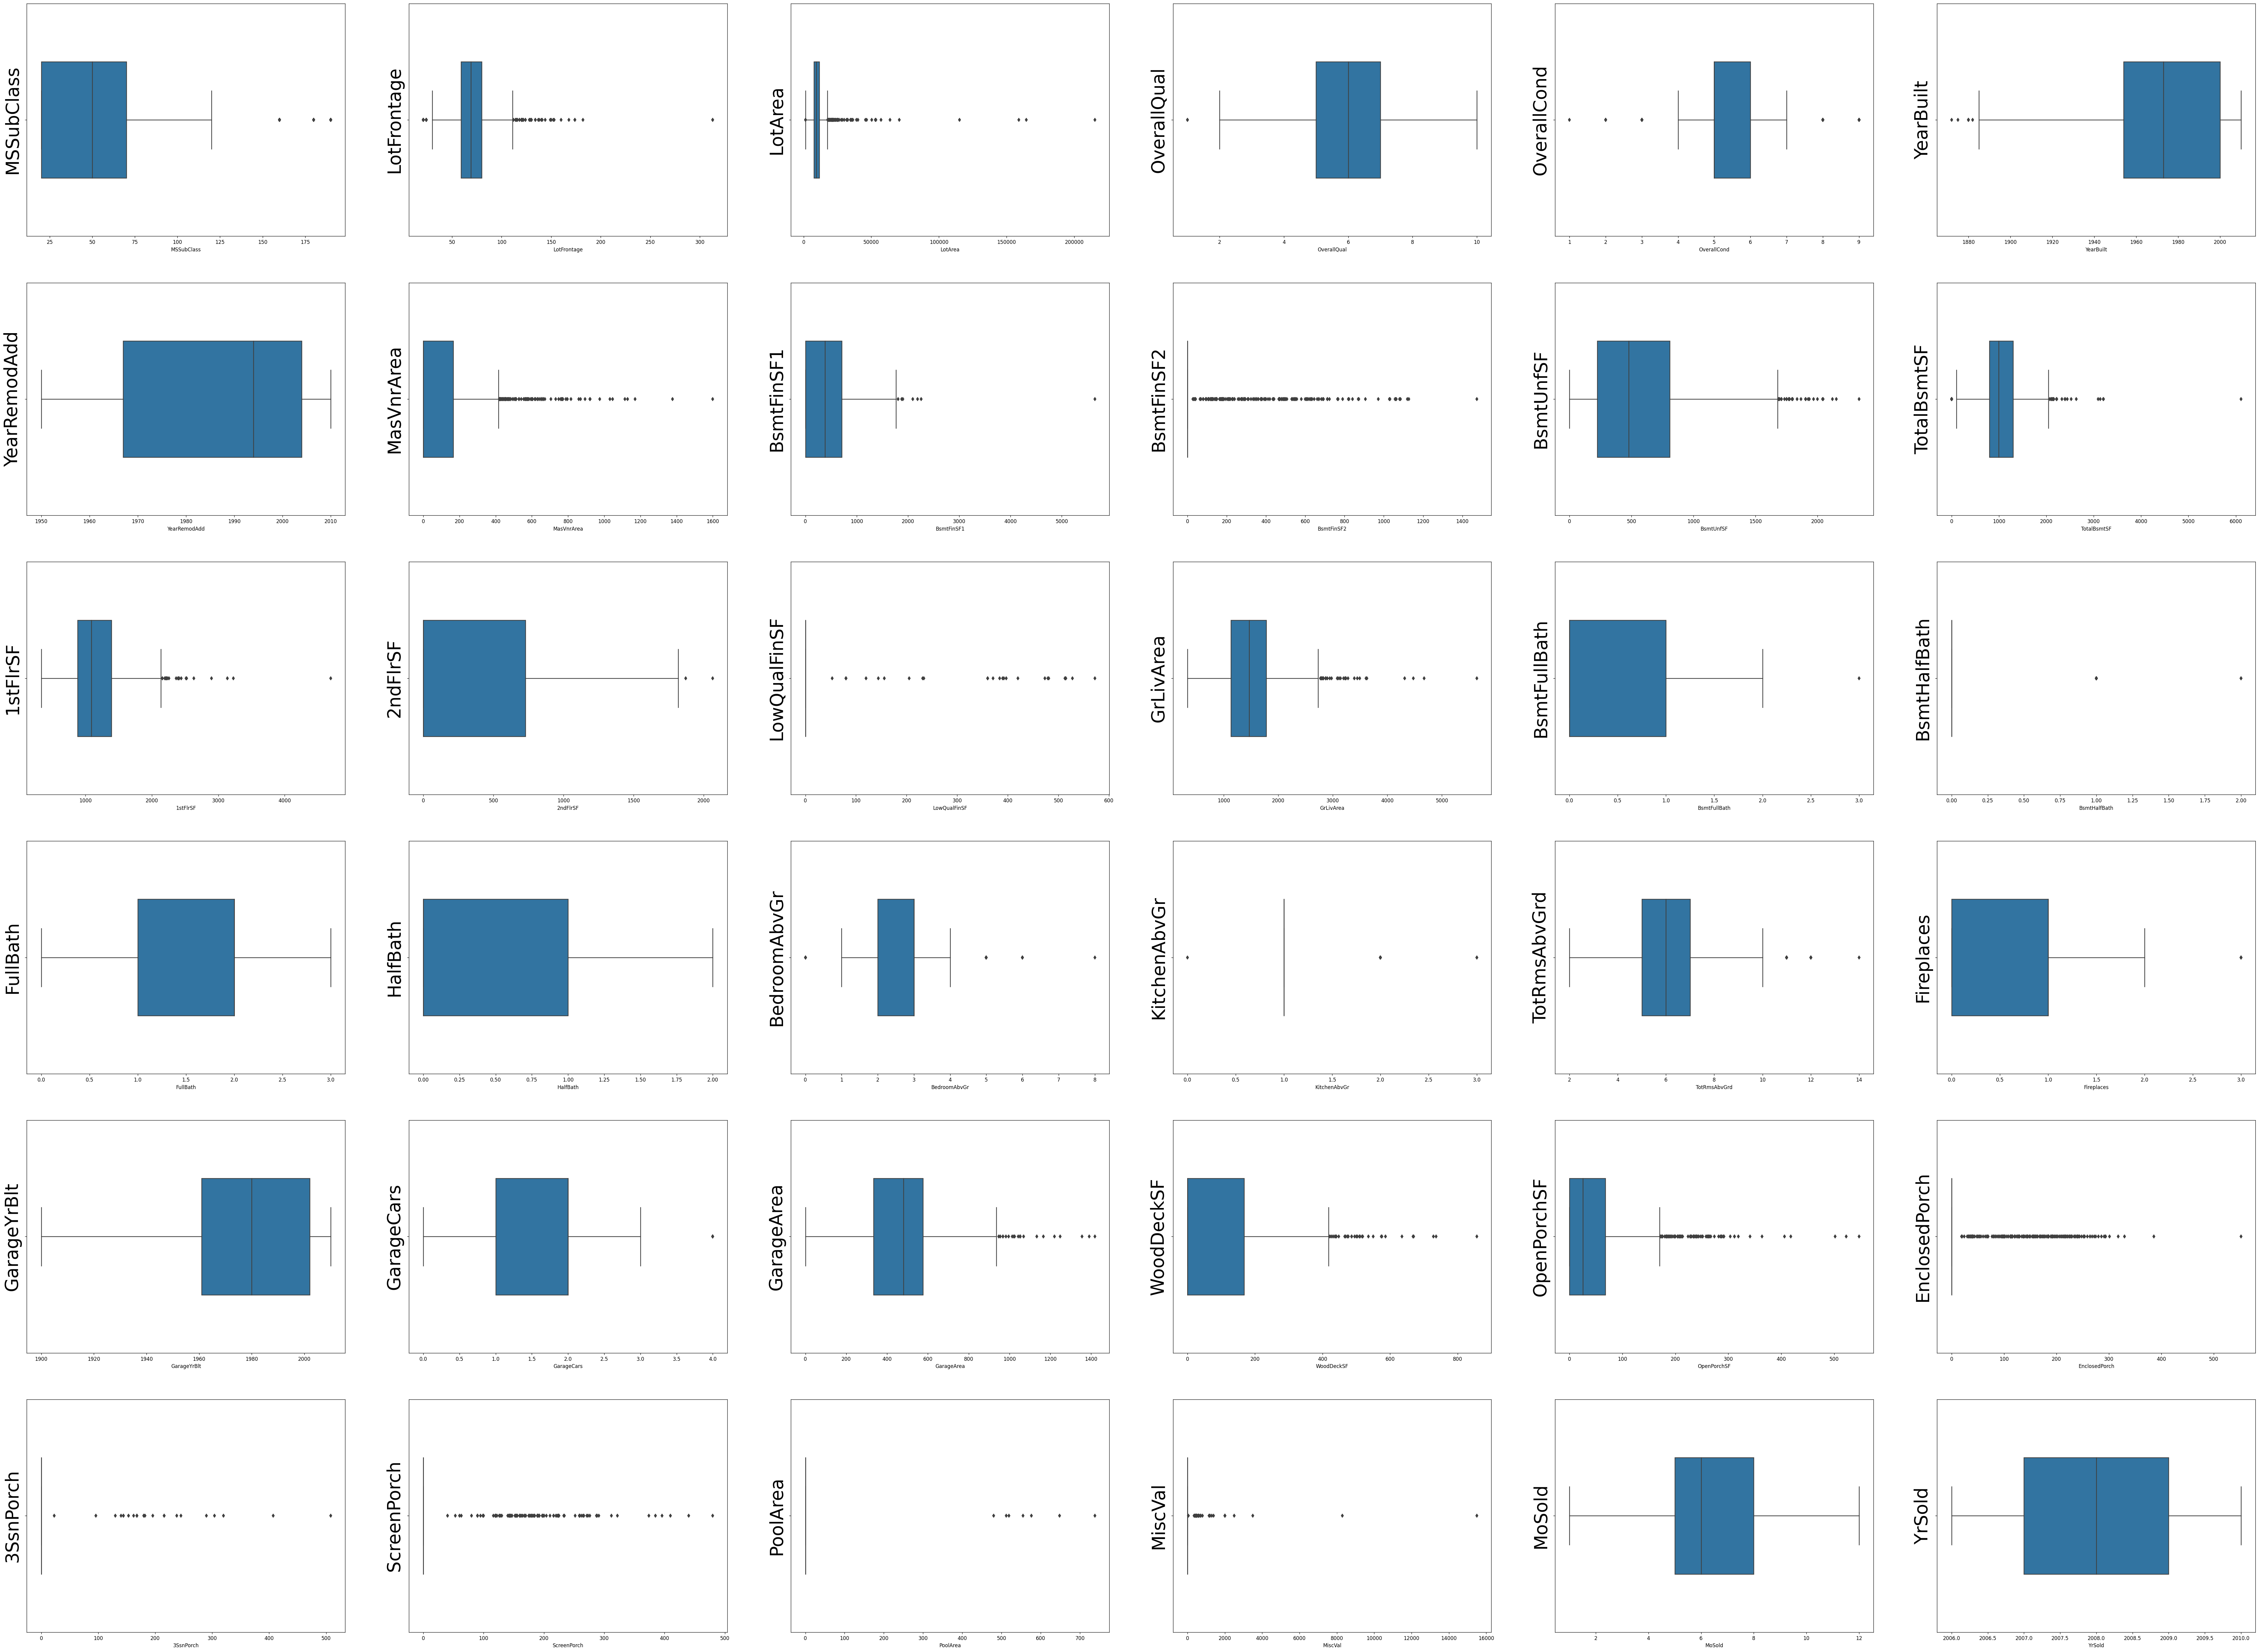

In [26]:
# 繪製圖形
# 新增畫布
# boxpolt 異常值(離群值)
fig = plt.figure(figsize=(80, 60), dpi=120)
# i = 0..(36-1)
for i in range(len(num_cols)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(df_train[num_cols[i]], orient='v', width=0.5)
    plt.ylabel(num_cols[i], fontsize=36)
plt.show()

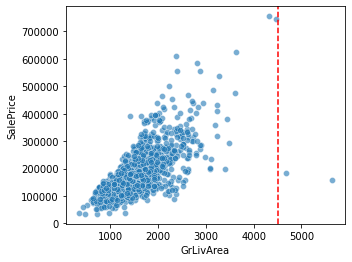

In [27]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, alpha=0.6)
plt.axvline(x=4500, color='r', linestyle='--')

右下角貌似為兩個離群值或異常值

In [30]:
df_train.GrLivArea.sort_values(ascending=False)[:3]
# 大於4500兩筆剃除

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

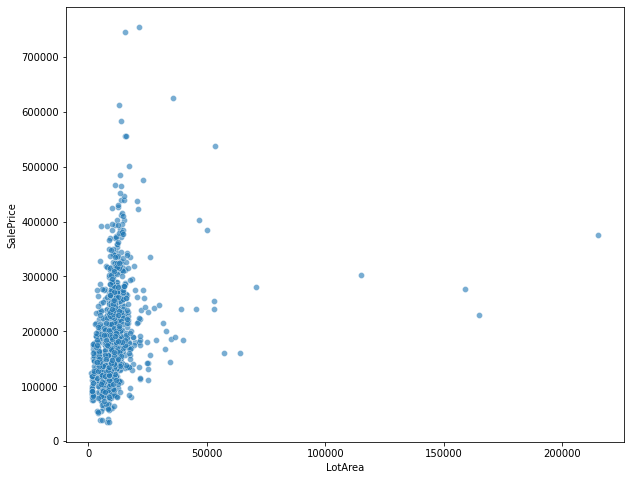

In [33]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train, alpha=0.6)
# 建築基地面積越大，售價卻未必更高，沒有正相關的情況，不視為異常值

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

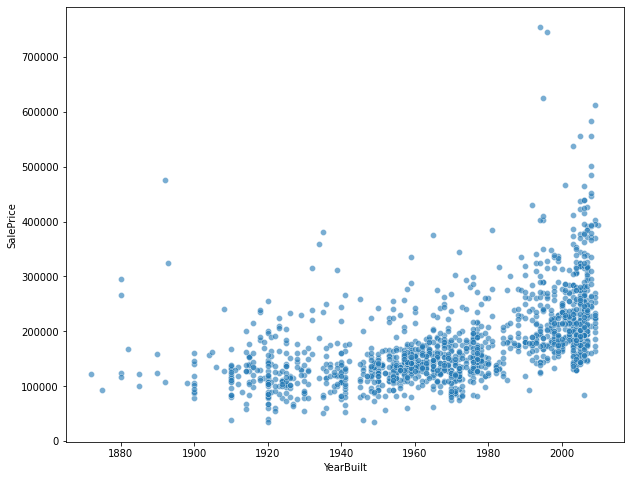

In [34]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

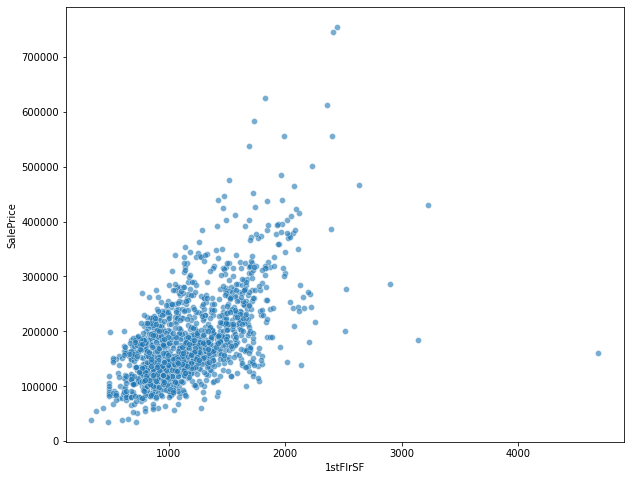

In [38]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df_train, alpha=0.6)
# 一樓面積跟房價看起來有相關性，所以後面那幾個怪怪的可以抓出來刪掉

In [39]:
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

1298    4692
496     3228
523     3138
Name: 1stFlrSF, dtype: int64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

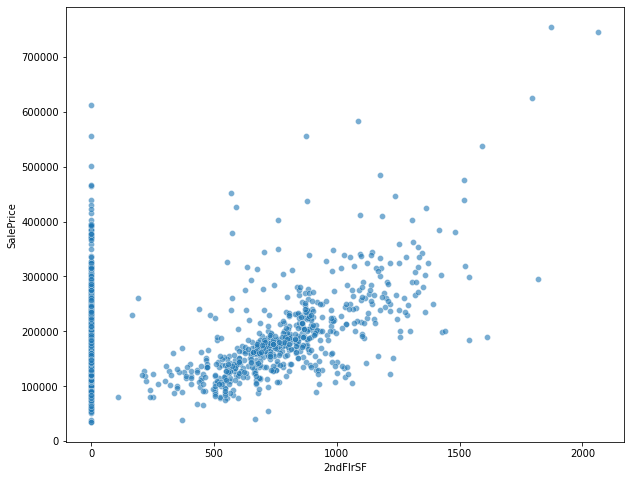

In [45]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df_train, alpha=0.6)
# 二樓面積，那些0可能是沒有二樓

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

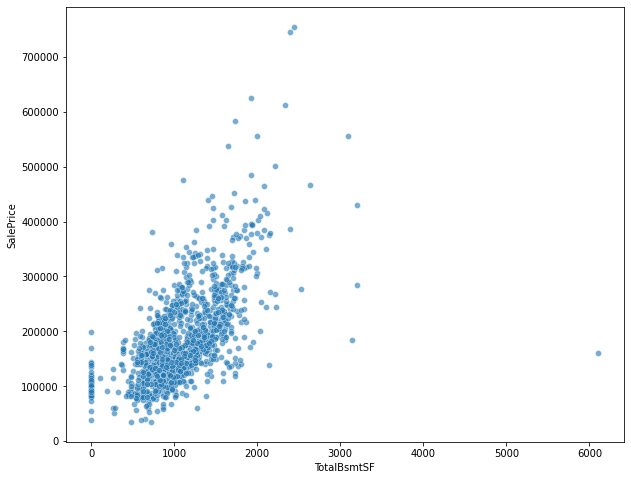

In [46]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, alpha=0.6)
# 地下室，0可能是沒有地下室

In [47]:
df_train["TotalBsmtSF"].sort_values(ascending=False)[:3]

1298    6110
332     3206
496     3200
Name: TotalBsmtSF, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

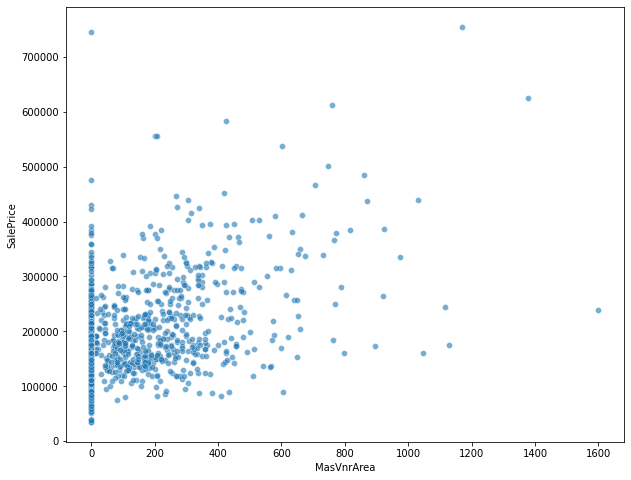

In [48]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df_train, alpha=0.6)
# 石材

In [52]:
# 異常值刪除
df_train.drop(df_train[(df_train["GrLivArea"] > 4500)].index, inplace = True)

In [49]:
# 保留正常值
df_train = df_train[df_train["GrLivArea"] < 4500]
# df_train = df_train[df_train.GrLivArea < 4500]
df_train.GrLivArea.sort_values(ascending=False)[:3]

1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [53]:
# 保留正常值
df_train = df_train[df_train["TotalBsmtSF"] < 4000]
# df_train = df_train[df_train.TotalBsmtSF < 4000]
df_train.TotalBsmtSF.sort_values(ascending=False)[:3]

332    3206
496    3200
440    3094
Name: TotalBsmtSF, dtype: int64

In [54]:
# 保留正常值
df_train = df_train[df_train["1stFlrSF"] < 3500]
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

496     3228
1024    2898
1373    2633
Name: 1stFlrSF, dtype: int64

In [55]:
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(1458, 80)

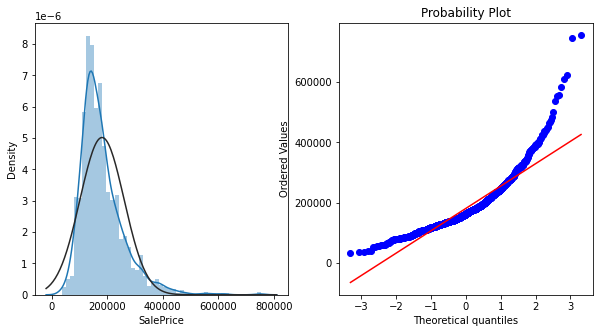

In [56]:
# 對SalePrice繪製長條圖與Q-Q圖(分位圖)，觀察是否符合常態分布
from scipy import stats

plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

# SalePrice 不完全符合常態分布
# RMSE
# 對數轉換

In [57]:
df_train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64

In [59]:
# 轉換成對數形式  np.log1p()，將數值轉換成對數形式
# 轉換成對數的好處是甚麼? 統一維度，讓資料符合常態分佈
# 
df_train.SalePrice = np.log1p(df_train.SalePrice)
df_train.SalePrice

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
          ...   
1453    2.570514
1454    2.584365
1455    2.602181
1456    2.554469
1457    2.557351
Name: SalePrice, Length: 1458, dtype: float64

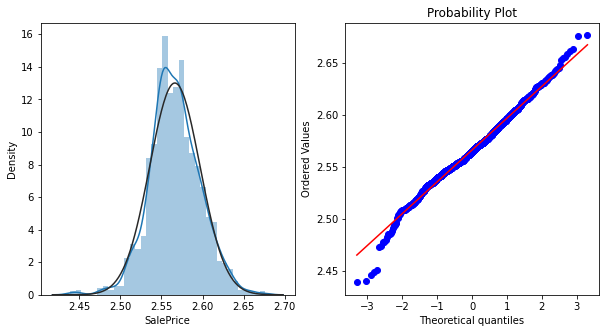

In [60]:
plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

In [61]:
# 合併資料進行統一預處理
# 特徵與標籤分離
y = df_train.SalePrice.reset_index(drop=True)
train_X = df_train.drop(["SalePrice"], axis=1)
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [62]:
y.head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

In [63]:
df_train.SalePrice.reset_index?

Signature:
df_train.SalePrice.reset_index(
    level=None,
    drop=False,
    name=<no_default>,
    inplace=False,
)
Docstring:
Generate a new DataFrame or Series with the index reset.

This is useful when the index needs to be treated as a column, or
when the index is meaningless and needs to be reset to the default
before another operation.

Parameters
----------
level : int, str, tuple, or list, default optional
    For a Series with a MultiIndex, only remove the specified levels
    from the index. Removes all levels by default.
drop : bool, default False
    Just reset the index, without inserting it as a column in
    the new DataFrame.
name : object, optional
    The name to use for the column containing the original Series
    values. Uses ``self.name`` by default. This argument is ignored
    when `drop` is True.
inplace : bool, default False
    Modify the Series in place (do not create a new object).

Returns
-------
Series or DataFrame or None
    When `drop` is False (th

In [64]:
features = pd.concat([train_X, df_test], axis=0).reset_index(drop=True)
features.shape

(2917, 79)

In [65]:
features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [67]:
# 數值變數中實際為類別變數的特徵欄位(分布並不連續)
transform_cols = []
for col in num_cols:
    if len(features[col].unique()) < 20:
        transform_cols.append(col)
transform_cols
# 其中'BsmtFullBath', 'BsmtHalfBath',貌似為數值型其實是類別型，0沒有1有

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [71]:
# 房屋類型有16種
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [72]:
len(features.MSSubClass.unique())

16

In [73]:
features.BsmtFullBath

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2912    0.0
2913    0.0
2914    1.0
2915    0.0
2916    0.0
Name: BsmtFullBath, Length: 2917, dtype: float64

In [74]:
# 售出年份
features.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: int64

In [75]:
# 售出月份
features.MoSold

0        2
1        5
2        9
3        2
4       12
        ..
2912     6
2913     4
2914     9
2915     7
2916    11
Name: MoSold, Length: 2917, dtype: int64

In [76]:
# MSSubClass、MoSold、YrSold特徵列轉換成string格式
# 轉換成類別型變數，需要用到LabelEncoder或OneHotEncoder(需為字串)，所以進行字串形式轉換
features.MSSubClass = features.MSSubClass.apply(str)
features.MoSold = features.MoSold.apply(str)
features.YrSold = features.YrSold.apply(str)

In [77]:
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: object

In [78]:
# list的remove()函數
num_cols.remove("MSSubClass")
num_cols.remove("MoSold")
num_cols.remove("YrSold")
cat_cols.append("MSSubClass")
cat_cols.append("MoSold")
cat_cols.append("YrSold")

In [79]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [82]:
features_na = (features.isna().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na==0].index).sort_values(ascending=False)
#                             Key : Value
features_na_df = pd.DataFrame({"NA_Ratio": features_na})
features_na_df.head(10)

,NA_Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


In [83]:
# 缺失值處理 - 缺失值會導致模型無法運作，所以必須事先處理
features.isna().sum().sort_values(ascending=False)[:35]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

Text(0.5, 1.0, 'Percent of Missing Value')

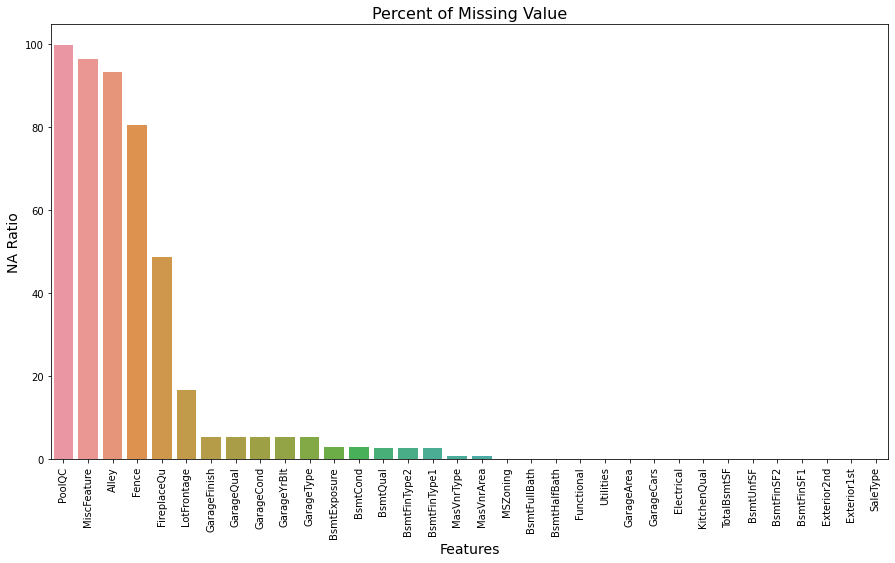

In [84]:
# 視覺化表示
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation="90") # 避免字重疊
sns.barplot(x=features_na.index, y=features_na)
plt.xlabel("Features", fontsize=14)
plt.ylabel("NA Ratio", fontsize=14)
plt.title("Percent of Missing Value", fontsize=16)

In [85]:
# 處理PoolQC的NA值 -> 沒有游泳池
features.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [86]:
features.PoolQC.fillna("None").unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [87]:
# 統一處理類別型資料的NA問題
features[cat_cols].isna().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
Exterior2nd         1
Street              0
LandSlope           0
MoSold              0
MSSubClass          0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
Neighborhood        0
HouseStyle          0
Condition1          0
Condition2          0
Foundation          0
RoofMatl            0
RoofStyle           0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
YrSold    

In [88]:
na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
           'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
           'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
for col in na_cols:
    features[col] = features[col].fillna("None")

features[cat_cols].isna().sum().sort_values(ascending=False)
# 類別型資料，通常填入眾數

MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageType        0
HeatingQC         0
CentralAir        0
FireplaceQu       0
GarageQual        0
GarageFinish      0
BsmtFinType2      0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleCondition     0
MSSubClass        0
MoSold            0
Heating           0
BsmtExposure      0
BsmtFinType1      0
Street            0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
YrSold            0
dtype: int64

In [89]:
# 眾數
features.SaleType.mode()[0]

'WD'

In [90]:
# 平均值
features.LotArea.mean()

10139.439149811451

In [91]:
# 中位數
features.LotFrontage.median()

68.0

In [93]:
# 缺失值，fillna()填值 - 0、眾數、平均值、中位數
# 其餘沒有NA值的類別型資料，我們以眾數來填補缺失值
# MSZoning: 銷售分區
# MSSubClass: 銷售的住宅類型
no_na_cols = ["MasVnrType", "Functional", "Utilities", "SaleType", "Electrical", "Exterior2nd", "Exterior1st", "KitchenQual"]

for col in no_na_cols:
    features[col] = features[col].fillna(features[col].mode()[0])
    
features[cat_cols].isna().sum().sort_values(ascending=False)

MSZoning         4
GarageFinish     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
Street           0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MoSold           0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
YrSold           0
dtype: int64

# Pandas Grouping
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html <br>
By “group by” we are referring to a process involving one or more of the following steps:
1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure

In [ ]:
# 利用字典創建一個DataFrame
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", np.nan, np.nan, "two", np.nan, "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

In [ ]:
# 以A為依據進行分組，做加總
df.groupby("A").sum()

In [ ]:
# lambda - 匿名的function
# def function(para1, para2):...
#                       x:前面的值
df["B"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df.B.mode()[0]

In [ ]:
df.groupby("A")["B"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df.groupby("B").sum()

In [ ]:
# 樞紐分析表
df.groupby(["A", "B"]).sum()

In [ ]:
# transform and lambda       apply
df = pd.DataFrame(
    {
        "A": range(3),
        "B": range(1, 4)
    }
)
df

In [ ]:
df = df.transform(lambda x: x + 1)

In [ ]:
# MSSubClass(分組) --> MSZoning
features["MSZoning"] = features.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
features[cat_cols].isna().sum().sort_values(ascending=False)

# 以上將所有類別型欄位的缺失值都填補完成
# 接下來要處理數值型欄位的缺失值

In [ ]:
# 缺失狀況
features[num_cols].isna().sum().sort_values(ascending=False)

In [ ]:
features.shape

In [ ]:
# 以比例看缺失值
(features[num_cols].isna().sum() / features.shape[0]).sort_values(ascending=False)

In [ ]:
num_na_cols = ["GarageYrBlt", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath", 
               "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

for col in num_na_cols:
    features[col] = features[col].fillna(0)
    
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

In [ ]:
# Neighborhood: 物理位置(在城市的位置) 影響LotFrontage，先利用Neighborhood做groupby，再填LotFrontage的中位數
features["LotFrontage"] = features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
features["LotFrontage"] = features["LotFrontage"].transform(lambda x: x.fillna(x.median()))
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

In [ ]:
features["LotFrontage"].median()

In [ ]:
features.head(10)

In [ ]:
# 確認無空值
features.info()

# 特徵欄位的合併

In [ ]:
# 基於已有特徵進行組合
# 房屋居住總面積  TotalBsmtSF   GrLivArea
features["TotalSF"] = features["TotalBsmtSF"] + features["GrLivArea"]
features["TotalSF"].head()

In [ ]:
features["TotalBsmtSF"].head()

In [ ]:
features["GrLivArea"].head()

In [ ]:
# 房屋建築總區域面積  LotFrontageL 房屋到街道之間的距離  LotArea: 建築面積
features["Area"] = features["LotArea"] * features["LotFrontage"]
features["Area"].head()

In [ ]:
# 總衛浴數，*0.5為半套衛浴
features["Total_Bathrooms"] = features["FullBath"] + (0.5 * features["HalfBath"]) + features["BsmtFullBath"] + (0.5 * features["BsmtHalfBath"])
features["Total_Bathrooms"].head()

In [ ]:
# 門廊總面積
features["Total_PorchSF"] = features["OpenPorchSF"] + features["EnclosedPorch"] + features["3SsnPorch"] + features["ScreenPorch"]
features["Total_PorchSF"].head()

In [ ]:
# 將新特徵加到數值欄位中
num_cols.append("TotalSF")
num_cols.append("Area")
num_cols.append("Total_Bathrooms")
num_cols.append("Total_PorchSF")
features.shape

In [ ]:
# 繪製熱圖
train_ = features.iloc[:len(y), :]
train_ = pd.concat([train_, y], axis=1)
cols = train_.corr().nlargest(12, "SalePrice").index  #只抓前12個

plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(train_[cols].corr(), square=True, annot=True)

In [ ]:
# 由熱圖所知，以上幾個欄位都跟房價有密切相關
train_["OverallQual"].value_counts()

In [ ]:
sns.distplot(features['OverallQual'], bins = 10, kde = False)

### 分箱 Binning
1. 連續型的特徵資料進行分箱，讓資料有更明確的含意
2. 有效減少資料的過度擬合，測試集的準確度才能提升
3. (讓她看起來像常態分布??)

In [ ]:
train_["OverallQual"].head()

In [ ]:
def OverallQual_Category(cat):
    if cat <= 4:
        return 1
    elif 4 < cat <= 6:
        return 2
    elif 6 < cat <= 8:
        return 3
    else:
        return 4

features["OverallQual_Cat"] = features["OverallQual"].apply(OverallQual_Category)

In [ ]:
features["OverallQual_Cat"].head()

In [ ]:
sns.distplot(features["OverallQual_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features["TotalSF"], bins=10, kde=False)

In [ ]:
def TotalSF_Category(cat):
    if cat <= 2000:
        return 1
    elif 2000 < cat <= 3000:
        return 2
    elif 3000 < cat <= 4000:
        return 3
    else:
        return 4

features["TotalSF_Cat"] = features["TotalSF"].apply(TotalSF_Category)

In [ ]:
features["TotalSF_Cat"].head()

In [ ]:
sns.distplot(features["TotalSF_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['GrLivArea'] , bins=10, kde=False)


In [ ]:
def GrLivArea_Category(cat):
    if cat <= 1000:
        return 1
    elif 1000 < cat <= 1500:
        return 2
    elif 1500 < cat <= 2000:
        return 3
    else:
        return 4

features["GrLivArea_Cat"] = features["GrLivArea"].apply(GrLivArea_Category)

In [ ]:
features["GrLivArea_Cat"].head()

In [ ]:
sns.distplot(features["GrLivArea_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['GarageCars'] , bins=10, kde=False)

In [ ]:
def GarageCars_Category(cat):
    if cat <= 1:
        return 1
    elif 1 < cat <= 2:
        return 2
    elif 2 < cat <= 3:
        return 3
    else:
        return 4

features["GarageCars_Cat"] = features["GarageCars"].apply(GarageCars_Category)

In [ ]:
features["GarageCars_Cat"].head()

In [ ]:
sns.distplot(features["GarageCars_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['Total_Bathrooms'] , bins=10, kde=False)

In [ ]:
def Total_Bathrooms_Category(cat):
    if cat <= 1.5:
        return 1
    elif 1.5 < cat <= 2:
        return 2
    elif 2 < cat <= 2.8:
        return 3
    else:
        return 4

features["Total_Bathrooms_Cat"] = features["Total_Bathrooms"].apply(Total_Bathrooms_Category)

In [ ]:
features["Total_Bathrooms_Cat"].head()

In [ ]:
sns.distplot(features["Total_Bathrooms_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['GarageArea'] , bins=10, kde=False)

In [ ]:
def GarageArea_Category(cat):
    if cat <= 250:
        return 1
    elif 250 < cat <= 400:
        return 2
    elif 400 < cat <= 500:
        return 3
    elif 500 < cat <=650:
        return 4
    else:
        return 5

features["GarageArea_Cat"] = features["GarageArea"].apply(GarageArea_Category)

In [ ]:
features["GarageArea_Cat"].head()

In [ ]:
sns.distplot(features["GarageArea_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['TotalBsmtSF'] , bins=10, kde=False)

In [ ]:
def TotalBsmtSF_Category(cat):
    if cat <= 650:
        return 1
    elif 650 < cat <= 1100:
        return 2
    elif 1100 < cat <= 1600:
        return 3
    else:
        return 4

features["TotalBsmtSF_Cat"] = features["TotalBsmtSF"].apply(TotalBsmtSF_Category)

In [ ]:
features["TotalBsmtSF_Cat"].head()

In [ ]:
sns.distplot(features["TotalBsmtSF_Cat"], bins=10, kde=False)

In [ ]:
sns.distplot(features['LotFrontage'] , bins=10, kde=False)

In [ ]:
def LotFrontage_Category(cat):
    if cat <= 15:
        return 1
    elif 15 < cat <= 20:
        return 2
    elif 20 < cat <= 25:
        return 3
    else:
        return 4

features["LotFrontage_Cat"] = features["LotFrontage"].apply(LotFrontage_Category)

In [ ]:
features["LotFrontage_Cat"].head()

In [ ]:
sns.distplot(features["LotFrontage_Cat"], bins=10, kde=False)

In [ ]:
# 將建立的分組加入類別型變數中
cat_cols.append('GarageArea_Cat')  
cat_cols.append('GrLivArea_Cat')   
cat_cols.append('TotalBsmtSF_Cat') 
cat_cols.append('TotalSF_Cat') 
cat_cols.append('OverallQual_Cat')   
cat_cols.append('LotFrontage_Cat')

features.shape

In [ ]:
# 數值型變數偏度修正，特徵儘可能轉化為正態分佈狀態
# 繪圖檢視數值型特徵變數的偏度
skew_features = features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)  # 顯示偏度

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 12))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols], orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# 繪製直方圖和Q-Q圖，清楚資料分佈結構
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)

In [ ]:
# 以0.5(偏度的概念)作為閾值，統計偏度超過此數值的高偏度分佈資料列，獲取這些資料列的index
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
high_skew.sort_values(ascending=False)

In [ ]:
# 對高偏度資料進行處理，將其轉化為正態分佈時，一般使用Box-Cox變換。它可以使資料滿足線性性、獨立性、方差齊次以及正態性的同時，又不丟失資訊。
# 使用boxcox_normmax用於找出最佳的λ值
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)

In [ ]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['LotArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['LotArea'],plot=plt)

In [ ]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['OverallQual'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['OverallQual'],plot=plt)

In [ ]:
# 特徵欄位中，類別型資料會有一些類別值佔據大部分的內容，這樣的特徵可能具有單一值
# 對於模型訓練沒有助益，可以刪除
features[cat_cols].describe(include = 'O').T  # 物件也加入，並進行轉置(T)

In [ ]:
# 單一值占 > 95% (2771)特徵欄位要刪除
freq_ = features[cat_cols].describe(include = 'O').T.freq

In [ ]:
freq_.index

In [ ]:
drop_cols = []
for i, num in enumerate(freq_):
    if freq_[i]>2771:
        drop_cols.append(freq_.index[i])
drop_cols

In [ ]:
# 將drop_cols從features中移除
features = features.drop(drop_cols, axis = 1) # axis = 1才會把整個col刪掉

In [ ]:
# 將drop_cols從cat_cols中移除
for col in drop_cols:
    cat_cols.remove(col)

In [ ]:
# 使特徵維度增加，可能增加訓練準確度但也可能降低
# 新增特徵欄位 HasPool 0:NO, 1:YES
#                                                              PoolArea > 0 表示有泳池
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
features.shape